In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from utils import process_prop_type, process_prop_area, detect_outliers_iqr

In [31]:
data_df = pd.read_csv('Real_Estate_Data.csv')

In [32]:
data_df['property_type_proc'] = data_df['Propert Type'].str.lower()
data_df['property_type_proc'] = data_df['property_type_proc'].apply(process_prop_type)
data_df = data_df[data_df['property_type_proc'] > 0]

In [33]:
data_df['property_area_proc'] = data_df['Property Area in Sq. Ft.'].str.lower()
data_df['property_area_proc'] = data_df['property_area_proc'].apply(process_prop_area)

In [34]:
data_df = data_df[data_df['Price in Millions'] != 'Null']
data_df['price_proc'] = data_df['Price in Millions'].astype(float)

In [35]:
data_df['area_by_price'] = data_df.property_area_proc/data_df.price_proc

<Axes: ylabel='Frequency'>

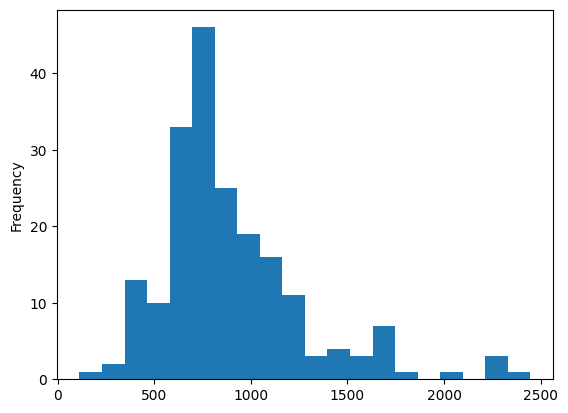

In [36]:
data_df['property_area_proc'].plot(kind='hist', bins=20)

In [37]:
# using z score to detect outliers in area since area distribution looks normal
data_df['z_score_area'] = zscore(data_df['property_area_proc'])

# Detect outliers with Z-scores > 3 or < -3
outliers = data_df[(data_df['z_score_area'].abs() > 3)]
outliers


,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,...,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18,property_type_proc,property_area_proc,price_proc,area_by_price,z_score_area
11,12,"Pune, Maharashtra, India",Ravet,5BHK,2220,188,18.8,Urban Space Creator,Urban Skyline,10.0,...,Yes,Yes,Yes,NaN,NaN,5.0,2220.0,18.8,118.085106,3.510215
12,13,"Pune, Maharashtra, India",Ravet,6BHK,2220,188,18.8,Urban Space Creator,Urban Skyline,10.0,...,Yes,Yes,Yes,NaN,NaN,6.0,2220.0,18.8,118.085106,3.510215
68,69,"Pune, Maharashtra, India",kayani nagar,4 bhk,2267,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,...,yes,yes,yes,NaN,NaN,4.0,2267.0,46.0,49.282609,3.634986
168,169,"Pune, Maharashtra, India",lonavala,4 bhk,2043,215,21.5,Puraniks,puraniks Sayama,NaN,...,yes,yes,yes,NaN,NaN,4.0,2043.0,21.5,95.023256,3.040334
184,185,"Pune, Maharashtra, India",baner,4.5bhk,2447,420,42.0,Kalpataru,jade residences,NaN,...,yes,yes,no,NaN,NaN,4.5,2447.0,42.0,58.261905,4.112831


In [38]:
data_df[data_df.property_type_proc >=4].groupby('property_type_proc')[['price_proc', 'property_area_proc']].mean()

,price_proc,property_area_proc
property_type_proc,,
4.0,23.60,1790.80
4.5,42.00,2447.00
5.0,16.45,1808.25
6.0,18.80,2220.00


In [39]:
# remove only thr 5bhk outlier which looks like a duplicate of the 6bhk
print(data_df.shape)
data_df = data_df[~((data_df.price_proc == 18.8) & (data_df.property_type_proc == 5))]
print(data_df.shape)


(199, 24)
(198, 24)


<Axes: ylabel='Frequency'>

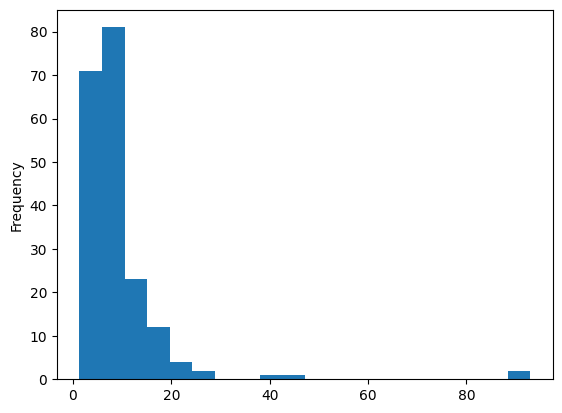

In [40]:
data_df['price_proc'].plot(kind='hist', bins=20)

In [41]:
# using iqr outlier detection for price since the distribution is skewed
price_outliers = detect_outliers_iqr(data_df, 'price_proc').sort_values(by='price_proc', ascending=False)

In [42]:
price_outliers

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,...,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18,property_type_proc,property_area_proc,price_proc,area_by_price,z_score_area
74,75,"Pune, Maharashtra, India",pisoli,3 bhk,930,930,93.0,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,3.0,930.0,93.0,10.000000,0.085657
73,74,"Pune, Maharashtra, India",pisoli,3 bhk,923,923,92.3,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,3.0,923.0,92.3,10.000000,0.067074
68,69,"Pune, Maharashtra, India",kayani nagar,4 bhk,2267,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,...,yes,yes,yes,NaN,NaN,4.0,2267.0,46.0,49.282609,3.634986
184,185,"Pune, Maharashtra, India",baner,4.5bhk,2447,420,42.0,Kalpataru,jade residences,NaN,...,yes,yes,no,NaN,NaN,4.5,2447.0,42.0,58.261905,4.112831
183,184,"Pune, Maharashtra, India",baner,3.5bhk,1740,250,25.0,Kalpataru,jade residences,NaN,...,yes,yes,no,NaN,NaN,3.5,1740.0,25.0,69.600000,2.235961
67,68,"Pune, Maharashtra, India",kayani nagar,3 bhk,1698,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,...,yes,yes,yes,NaN,NaN,3.0,1698.0,24.9,68.192771,2.124464
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.0,SUPREME,SUPREME ESTIA,5.0,...,yes,yes,yes,NaN,NaN,4.0,1600.0,23.0,69.565217,1.864304
168,169,"Pune, Maharashtra, India",lonavala,4 bhk,2043,215,21.5,Puraniks,puraniks Sayama,NaN,...,yes,yes,yes,NaN,NaN,4.0,2043.0,21.5,95.023256,3.040334
97,98,"Pune, Maharashtra, India",NIBM,3.5 bhk,1687,213,21.3,kundan Spaces,Presidia,NaN,...,yes,Yes,yes,NaN,NaN,3.5,1687.0,21.3,79.201878,2.095262
96,97,"Pune, Maharashtra, India",NIBM,3.5 bhk,1671,211,21.1,kundan Spaces,Presidia,NaN,...,yes,Yes,yes,NaN,NaN,3.5,1671.0,21.1,79.194313,2.052787


In [43]:
data_df[data_df['TownShip Name/ Society Name'] == 'brookefield willows']

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,...,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18,property_type_proc,property_area_proc,price_proc,area_by_price,z_score_area
69,70,"Pune, Maharashtra, India",pisoli,2 bhk,670,45.75,4.575,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,2.0,670.0,4.575,146.448087,-0.604564
70,71,"Pune, Maharashtra, India",pisoli,2 bhk,725,49.34,4.934,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,2.0,725.0,4.934,146.939603,-0.458555
71,72,"Pune, Maharashtra, India",pisoli,2 bhk,731,49.74,4.974,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,2.0,731.0,4.974,146.964214,-0.442627
72,73,"Pune, Maharashtra, India",pisoli,2 bhk,744,50.56,5.056,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,2.0,744.0,5.056,147.151899,-0.408116
73,74,"Pune, Maharashtra, India",pisoli,3 bhk,923,923,92.300,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,3.0,923.0,92.300,10.000000,0.067074
74,75,"Pune, Maharashtra, India",pisoli,3 bhk,930,930,93.000,nirman developers,brookefield willows,NaN,...,yes,yes,yes,NaN,NaN,3.0,930.0,93.000,10.000000,0.085657


In [44]:
# removing the top 2 3 bhk houses since the prices are very high given the area and other housed in the same township
# keeping the 
data_df = data_df[~((data_df['TownShip Name/ Society Name'] == 'brookefield willows') & (data_df.property_type_proc ==3))]

data_df.shape

(196, 24)

In [45]:
binary_features = ['ClubHouse',
       'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym']
for feat in binary_features:
    data_df[feat] = data_df[feat].str.strip()
    all_uvals =  data_df[feat].unique()
    for val in all_uvals:
        assert str.lower(val) in ['yes', 'no'], f"invalid val: '{val}'"
    data_df[feat + '_binary'] = data_df[feat].str.lower().replace({'yes': 1, 'no': 0})

In [46]:
# Combine binary features into a single column
data_df['Combined_Feature'] = ( data_df['ClubHouse_binary'] * (2 ** 0) +
                                data_df['School / University in Township _binary'] * (2 ** 1) +
                                data_df['Hospital in TownShip_binary'] * (2 ** 2) +
                                data_df['Mall in TownShip_binary'] * (2 ** 3) +
                                data_df['Park / Jogging track_binary'] * (2 ** 4) +
                                data_df['Swimming Pool_binary'] * (2 ** 5) +
                                data_df['Gym_binary'] * (2 ** 6))

In [47]:
# Convert categorical column to integer values
data_df['company_name_proc'], unique_values = pd.factorize(data_df['Company Name'])

# Create a dictionary mapping
company_name_mapping_dict = {category: index for index, category in enumerate(unique_values)}

# Convert categorical column to integer values
data_df['society_name_proc'], unique_values = pd.factorize(data_df['TownShip Name/ Society Name'])

# Create a dictionary mapping
society_name_mapping_dict = {category: index for index, category in enumerate(unique_values)}


In [48]:
train_df = data_df[['property_type_proc', 'property_area_proc', 'price_proc',
       'Combined_Feature', 'company_name_proc', 'society_name_proc']]

In [49]:
cols = list(train_df.columns)

for col in cols:
    train_df.rename(columns={col: re.sub('_proc$', '', col)}, inplace=True)

/var/folders/vc/s5rlxdqn251fq8txt2pzv_yr0000gn/T/ipykernel_29140/3340595424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={col: re.sub('_proc$', '', col)}, inplace=True)


In [50]:
train_df

,property_type,property_area,price,Combined_Feature,company_name,society_name
0,1.0,492.0,3.900,127,0,0
1,2.0,774.0,6.500,127,0,0
2,3.0,889.0,7.400,127,0,0
3,3.0,1018.0,8.900,127,0,0
4,2.0,743.0,7.400,127,1,1
...,...,...,...,...,...,...
195,3.0,1350.0,16.000,113,35,50
196,4.0,1600.0,23.000,113,35,50
197,2.0,789.0,9.500,112,36,51
198,3.0,1107.0,13.500,112,36,51


In [51]:
train_df.dropna(inplace=True)

/var/folders/vc/s5rlxdqn251fq8txt2pzv_yr0000gn/T/ipykernel_29140/519058362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(inplace=True)


In [52]:
if train_df.isnull().sum().sum() > 0:
    print("Missing values detected!")

In [53]:
train_df.dtypes

property_type       float64
property_area       float64
price               float64
Combined_Feature      int64
company_name          int64
society_name          int64
dtype: object

In [54]:
train_df.describe()

,property_type,property_area,price,Combined_Feature,company_name,society_name
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2.371795,886.517949,8.646872,88.553846,16.317949,25.569231
std,0.828907,364.755572,5.776863,34.796921,10.433463,14.504854
min,1.000000,113.000000,1.319000,16.000000,0.000000,0.000000
25%,2.000000,670.000000,5.100000,80.000000,7.000000,13.500000
50%,2.000000,793.000000,7.000000,113.000000,15.000000,25.000000
75%,3.000000,1035.000000,9.700000,113.000000,26.000000,38.000000
max,6.000000,2447.000000,46.000000,127.000000,36.000000,52.000000


In [58]:
# Normalize/scale numerical features if needed
scaler = StandardScaler()
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.drop('price')
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])


/var/folders/vc/s5rlxdqn251fq8txt2pzv_yr0000gn/T/ipykernel_29140/1393876886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])


In [59]:
# Train-test split (80:20 ratio)

# train_df = pd.read_csv("input/resd_features.csv") # # read the final csv data 

X = train_df.drop('price', axis=1)
y = train_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Use a robust regression algorithm (Random Forest Regressor)
# model = RandomForestRegressor(n_estimators=100, random_state=42)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [61]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2.71
R^2 Score: 0.76
